In [2]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
wine_dataset = load_wine()
wine_dataset

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
wine_dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
from sklearn import tree
from sklearn.tree import export_graphviz

In [6]:

x_train, x_test, y_train, y_test = train_test_split(wine_dataset.data[:, 11:13], wine_dataset['target'], random_state=17)

In [41]:
dtc = DecisionTreeClassifier()

In [42]:
dtc_model = dtc.fit(x_train, y_train)

In [17]:
# export_graphviz(dtc, out_file='tree.dot', feature_names=wine_dataset.feature_names[11:13], class_names=wine_dataset.target_names, filled=True)

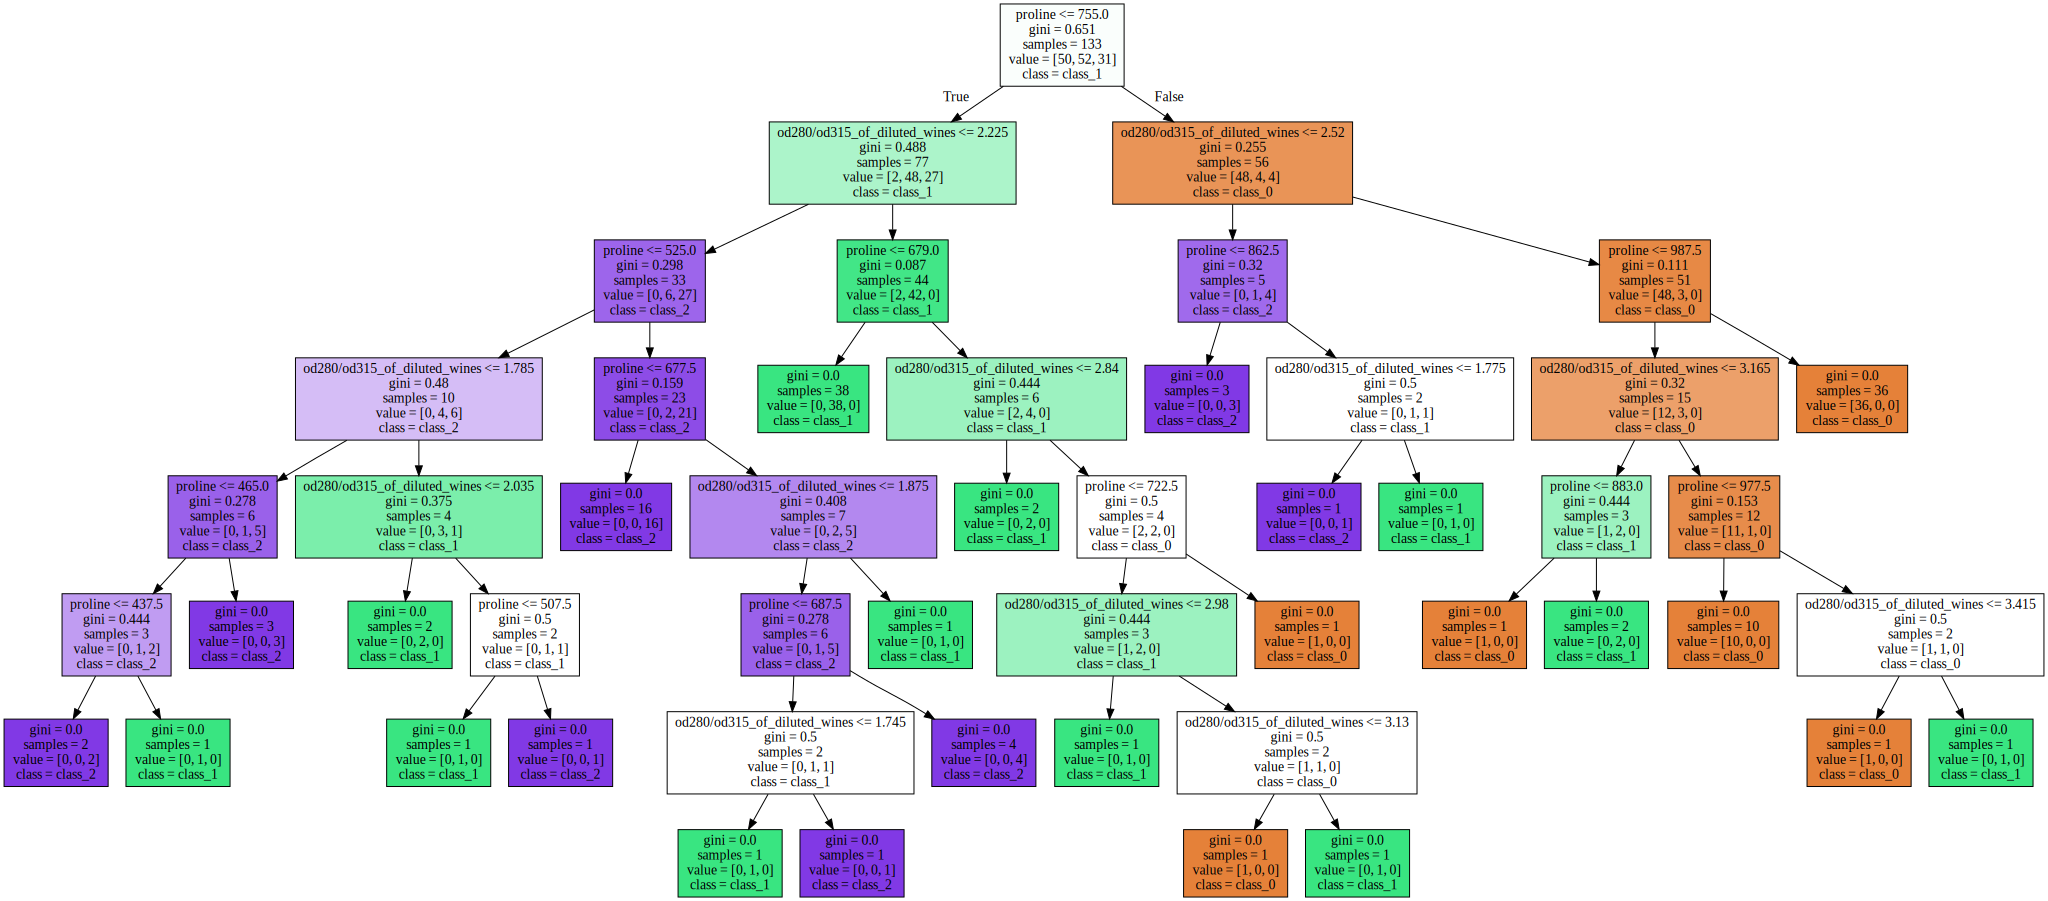

In [43]:
import graphviz

def print_graph(data):
    dot_data = tree.export_graphviz(data, out_file=None,
                                    feature_names=wine_dataset.feature_names[11:13],  
                                    class_names=wine_dataset.target_names,  
                                    filled=True)  
    return graphviz.Source(dot_data)  

print_graph(dtc_model)

In [44]:
dtc_predictions = dtc.predict(x_test)

In [45]:
accuracy = dtc.score(x_test, y_test)
accuracy

0.9111111111111111

In [28]:
dtc_param = DecisionTreeClassifier(max_features=2, random_state=17)

In [29]:
dtc_param_model = dtc_param.fit(x_train, y_train)
dtc_param_predict = dtc_param.predict(x_test)
accuracy_param = dtc_param.score(x_test, y_test)
accuracy_param

0.9111111111111111

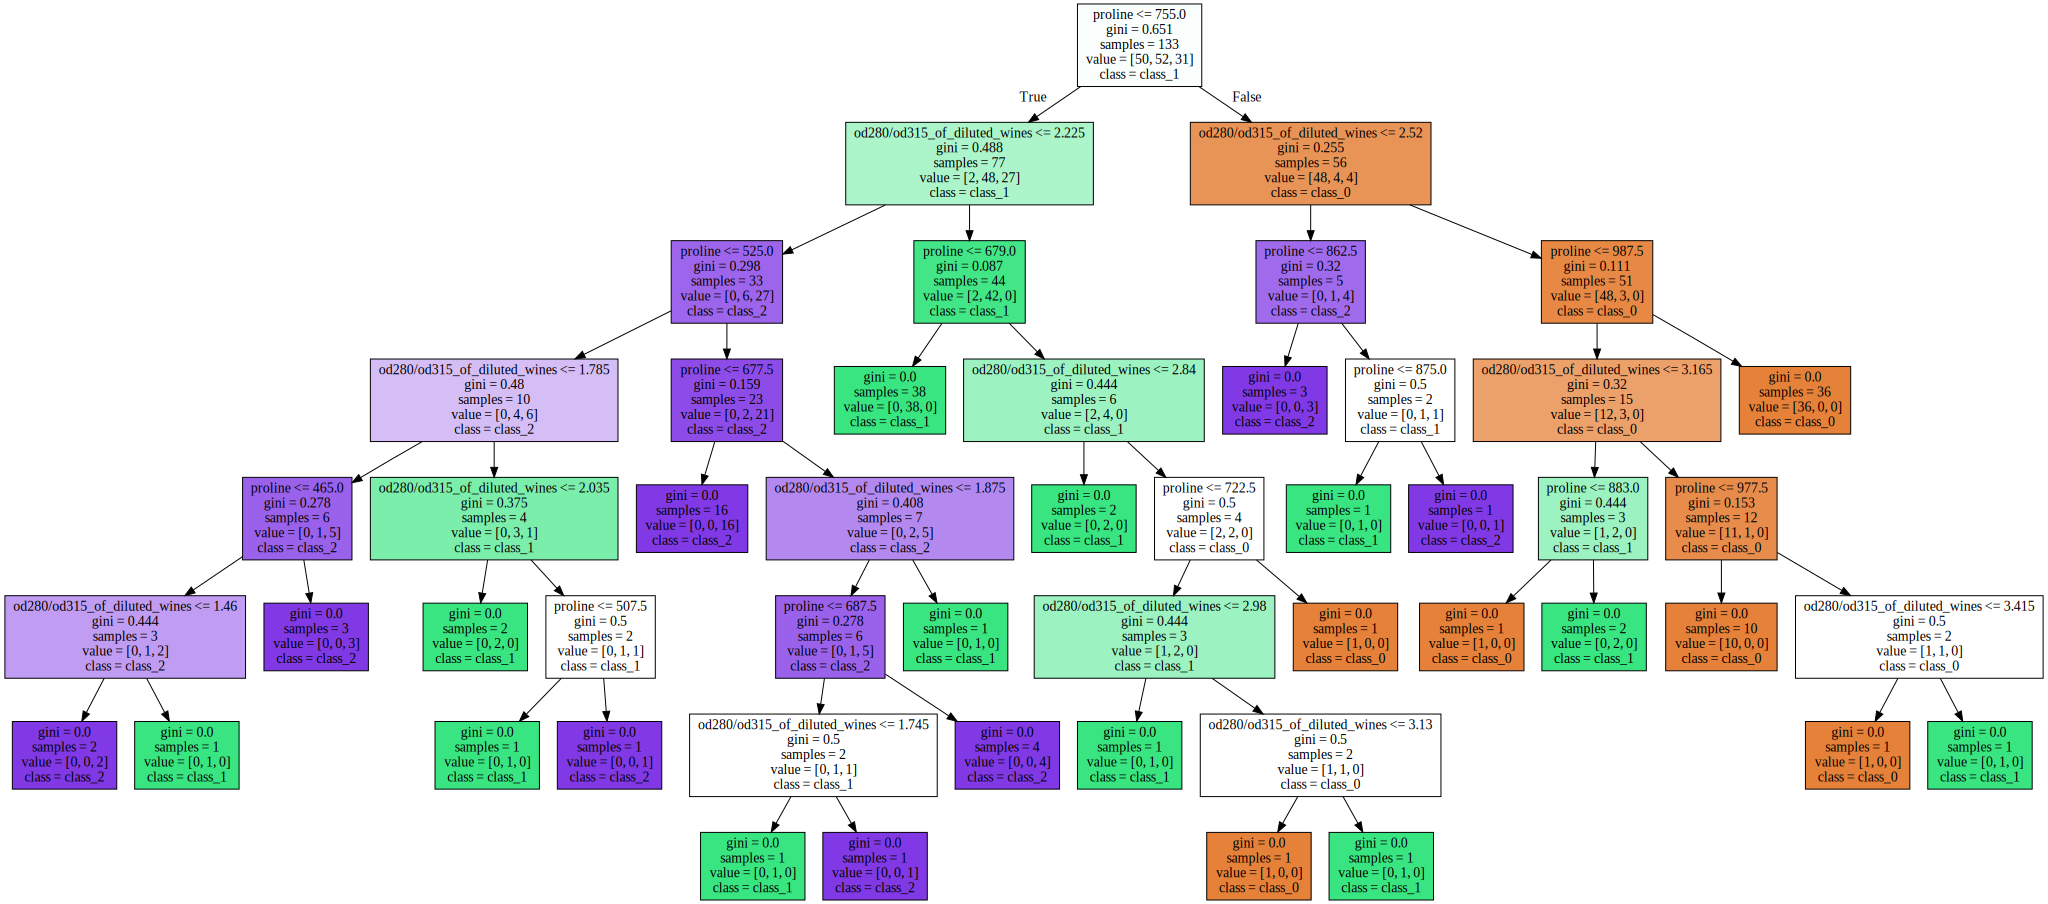

In [30]:
print_graph(dtc_param_model)

In [46]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [48]:
tree_params = {'max_depth': range(1, 6), 
               'max_features': range(1, 10)}

tree_grid = GridSearchCV(dtc_param, tree_params, cv=5)

In [50]:
tree_grid.fit(x_train, y_train)
tree_grid.best_params_

D:\ana\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ana\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ana\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\ana\lib\site-packages\sklearn\tree\_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\ana\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ana\lib\site

{'max_depth': 2, 'max_features': 2}

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
predicted = tree_grid.predict(x_test)

In [54]:
accuracy = tree_grid.score(x_test, y_test)
accuracy

0.9111111111111111